# Importing Libraries And Methods

In [1]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt # For Visualization

import seaborn as sns # For Visualization

from sklearn.preprocessing import LabelEncoder # For Label Encoding

%matplotlib inline
import copy

# Data Frame

In [2]:
df=pd.read_csv("Predict Price of Airline Tickets.csv") # read .csv file

In [3]:
df # Show The Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.isnull().sum() # summation about the missing values of the data which tells as if there a missing data or not 


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df=df.dropna() # Remove the "NaN" Values


In [6]:
# Convertung The Date And Time in the Dataset To The Format Used in Analysis

df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))

df["Dep_Time"] = df["Dep_Time"].apply(lambda x: pd.to_datetime(x))

df["Arrival_Time"] = df["Arrival_Time"].apply(lambda x: pd.to_datetime(x))

#------------------------------------------------------------------------------

#Split Dep_Time to  Departure_Hour and Departure_Minutes

df["Departure_Hour"] = df["Dep_Time"].dt.hour

df["Departure_Minutes"] = df["Dep_Time"].dt.minute

#------------------------------------------------------------------------------
#Split Arrival_Time to  Arrival_Hour and Arrival_Minutes

df["Arrival_Hour"] = df["Arrival_Time"].dt.hour

df["Arrival_Minutes"] = df["Arrival_Time"].dt.minute

#------------------------------------------------------------------------------

#Split Date_of_Journey to  Day_of_Journey and Month_of_Journey

df["Day_of_Journey"] = df["Date_of_Journey"].dt.day

df["Month_of_Journey"] = df["Date_of_Journey"].dt.month

#------------------------------------------------------------------------------

df=df.drop(df[df['Duration'] == '5m'].index)  # Access To The Column 'Duration' Where The Index of the Column Eqyal '5m' and delete The Row

#------------------------------------------------------------------------------

#Split Duration to  duration_hour and duration_min


df['duration_hour']=df['Duration'].str.split(' ').str[0].str.replace('h','').astype(int) #Access To The Index '0' Of the List and Replace the letter 'h' With none and return the datatype in integer  

df['duration_min'] = df['Duration'].str.split(' ').str[1].str.replace('m','').replace(np.nan,0).astype(int)  #Access To The Index '1' Of the List and Replace the letter 'm' With none

#and replace every 'Nan' Value with Zero and return the datatype in integer  

#------------------------------------------------------------------------------

# convert the column Duration to the format of time (hour:minute:seconds)

pd.to_timedelta(df["Duration"]) 

# create New Column with the name of 'Total_Min_Of_Journey Hours' equal to the duration over the pandas function timedelta with the parameter minutes=1 to show us the hours

df['Total_Min_Of_Journey'] =  df["Duration"] / pd.Timedelta(minutes=1) 



C:\Users\max\AppData\Local\Temp\ipykernel_7172\2044208357.py:3: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))
C:\Users\max\AppData\Local\Temp\ipykernel_7172\2044208357.py:3: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))
C:\Users\max\AppData\Local\Temp\ipykernel_7172\2044208357.py:3: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Date_of_Journey"] = df["Date_of_Journey"].apply(lambda x: pd.to_datetime(x))
C:\Users\max\AppData\Local\Temp\ipykernel_7172\2044208357.py:3: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [7]:
df['Total_Stops'].unique()  # Show the different Values in this Column 

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [8]:
def number_stops(x):      # define function number_stops which takes the parameter x
    
    if x == 'non-stop':   # if x equal to 'non-stop'
        
        return 0          # return 0 
    
    elif x == "1 stop":   # if x equal to '1 stop'
        
        return 1          # return 1
    
    elif x == "2 stops":  # if x equal to '2 stops'
        
        return 2          # return 2
    
    elif x == "3 stops":  # if x equal to '3 stops'
        
        return 3          # return 3
    
    elif x == "4 stops":  # if x equal to '4 stops'
        
        return 4          # return 4
    
    
df["Total_Stops"]=df["Total_Stops"].apply(number_stops)  # Apply the function 'number_stops' to the 'Total_Stops' Column

In [9]:
df['Route_1'] = df['Route'].str.split('?').str[0]    # define the Column 'Route_1' equal to the index '0' of the spliting of the Column 'Route' with the sepeartor '?'

df['Route_2'] = df['Route'].str.split('?').str[1]    # define the Column 'Route_2' equal to the index '1' of the spliting of the Column 'Route' with the sepeartor '?'

df['Route_3'] = df['Route'].str.split('?').str[2]    # define the Column 'Route_3' equal to the index '2' of the spliting of the Column 'Route' with the sepeartor '?'

df['Route_4'] = df['Route'].str.split('?').str[3]    # define the Column 'Route_4' equal to the index '3' of the spliting of the Column 'Route' with the sepeartor '?'

df['Route_5'] = df['Route'].str.split('?').str[4]    # define the Column 'Route_5' equal to the index '4' of the spliting of the Column 'Route' with the sepeartor '?'

df['Route_6'] = df['Route'].str.split('?').str[5]    # define the Column 'Route_6' equal to the index '5' of the spliting of the Column 'Route' with the sepeartor '?'

for i in ['Route_3','Route_4','Route_5','Route_6']:  # loop on the List Which Contain The Columns 'Route_3','Route_4','Route_5','Route_6'
    
    df[i].fillna('None',inplace=True)   # Fill The 'NaN' Values In Every Column with The Value 'None' , inplace=True means to apply this on the orginal dataset 

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month_of_Journey,duration_hour,duration_min,Total_Min_Of_Journey,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2022-07-13 22:20:00,2022-03-22 01:10:00,2h 50m,0,No info,...,3,2,50,170.0,BLR,DEL,None,None,None,None
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-07-13 05:50:00,2022-07-13 13:15:00,7h 25m,2,No info,...,1,7,25,445.0,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-07-13 09:25:00,2022-06-10 04:25:00,19h,2,No info,...,9,19,0,1140.0,DEL,LKO,BOM,COK,None,None
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,2022-07-13 18:05:00,2022-07-13 23:30:00,5h 25m,1,No info,...,12,5,25,325.0,CCU,NAG,BLR,None,None,None
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,2022-07-13 16:50:00,2022-07-13 21:35:00,4h 45m,1,No info,...,1,4,45,285.0,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU ? BLR,2022-07-13 19:55:00,2022-07-13 22:25:00,2h 30m,0,No info,...,9,2,30,150.0,CCU,BLR,None,None,None,None
10679,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,2022-07-13 20:45:00,2022-07-13 23:20:00,2h 35m,0,No info,...,4,2,35,155.0,CCU,BLR,None,None,None,None
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,2022-07-13 08:20:00,2022-07-13 11:20:00,3h,0,No info,...,4,3,0,180.0,BLR,DEL,None,None,None,None
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR ? DEL,2022-07-13 11:30:00,2022-07-13 14:10:00,2h 40m,0,No info,...,1,2,40,160.0,BLR,DEL,None,None,None,None


# ِVisualization


<AxesSubplot:xlabel='Airline', ylabel='Price'>

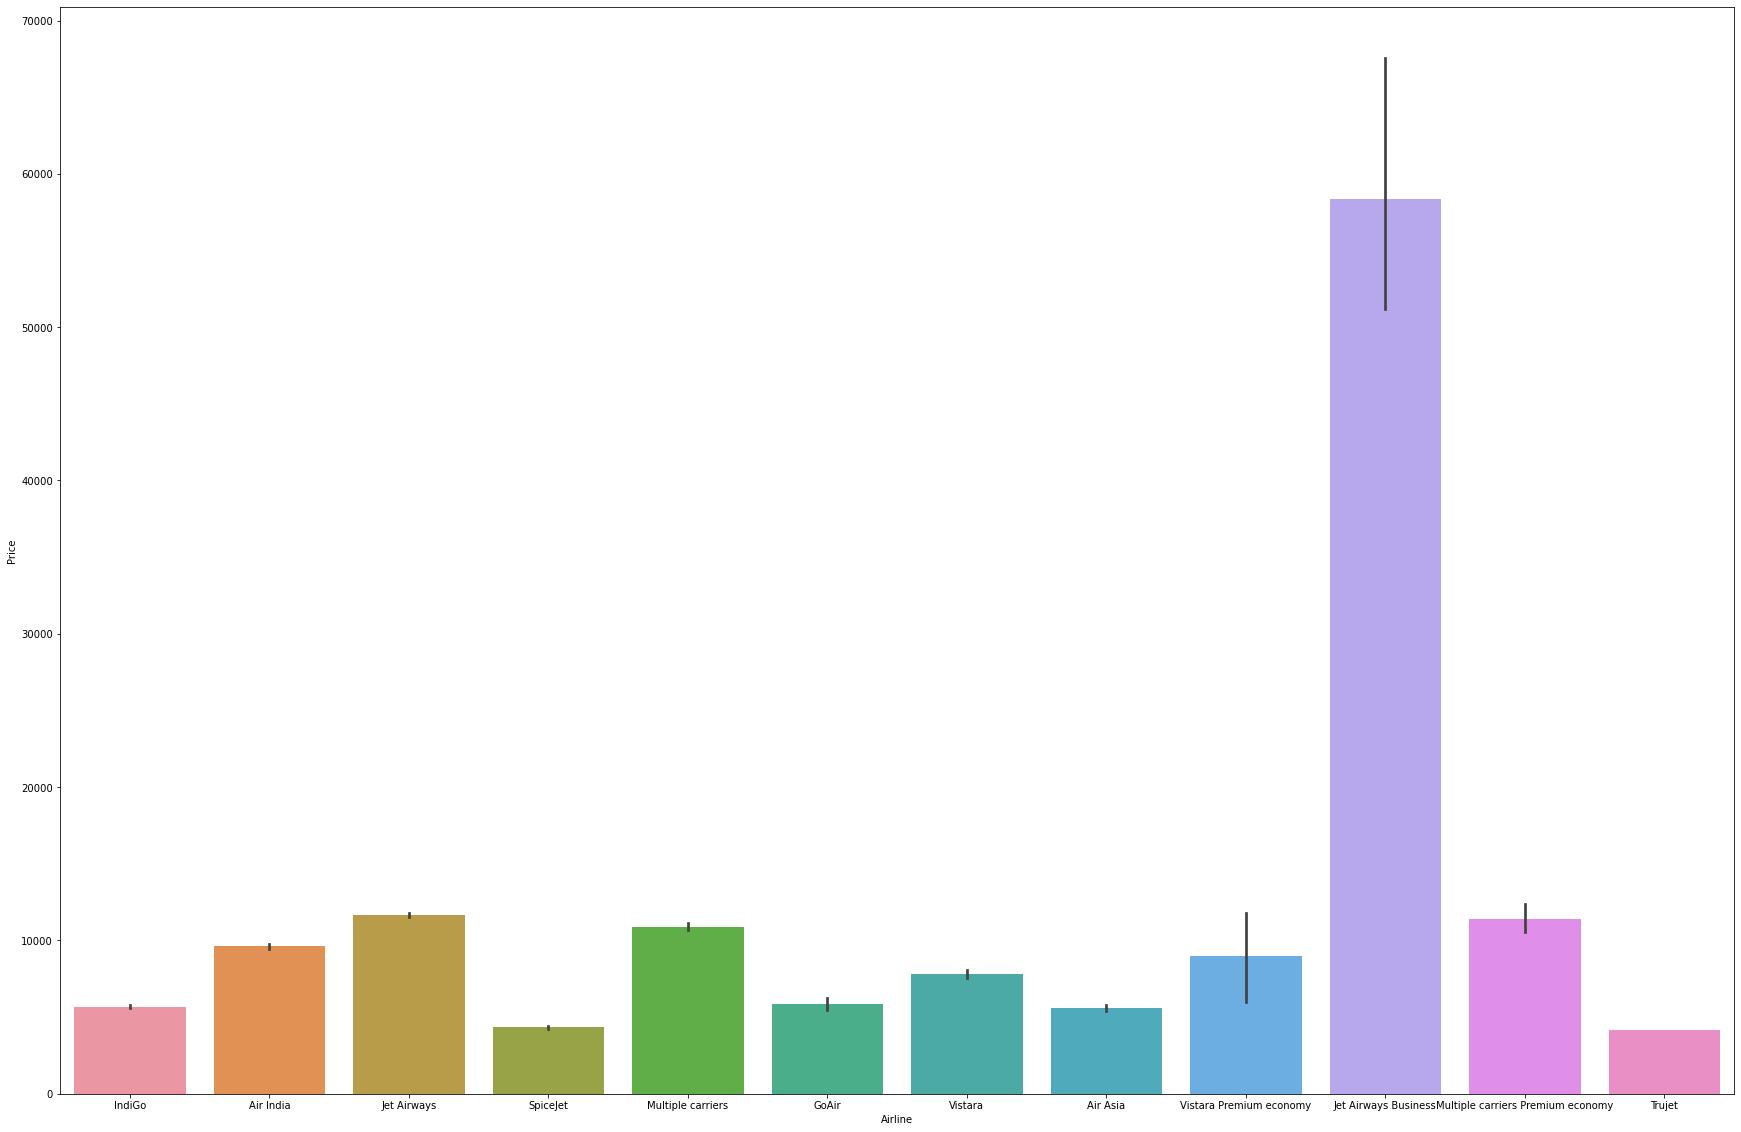

In [11]:
plt.figure(figsize=(30, 20))

sns.barplot(x='Airline',y='Price',data=df) # Relation Between Catigorical data 'Airline' in the X- Axis and Numerical data 'Prices' on Y-Axis

### Conclusion From The Plot is that : Jet Airways Business Has The Biggest Prices

<AxesSubplot:xlabel='Path', ylabel='count'>

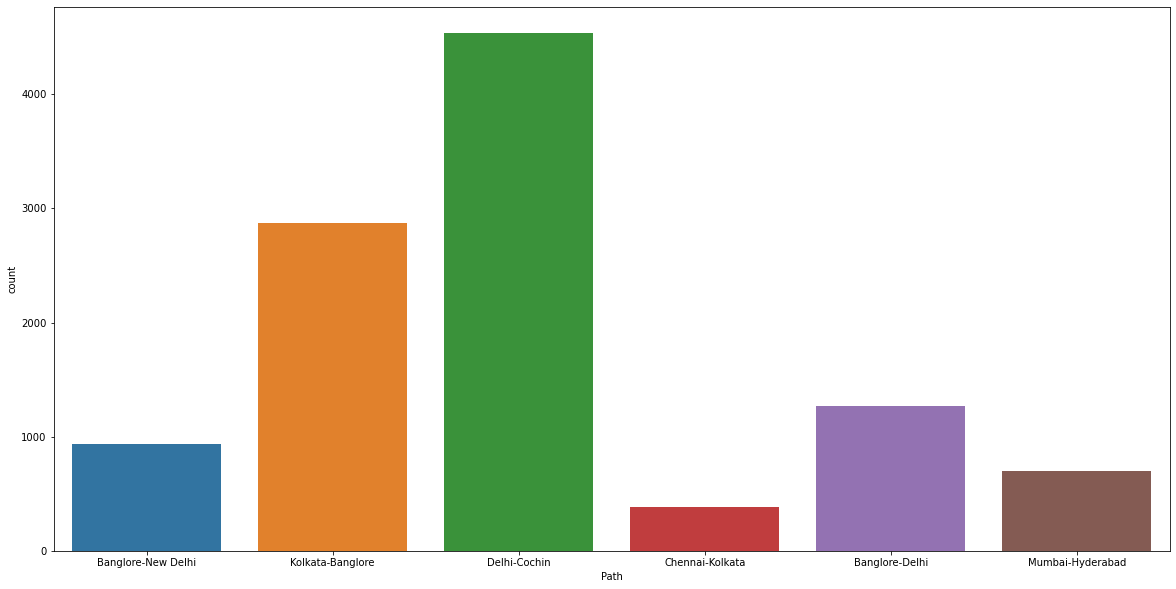

In [12]:
df["Path"]= df["Source"]+"-"+df["Destination"]  # Define A New Column with the name "Path" Which is The Concat of The Column Source and Destination 
 
plt.figure(figsize=(20, 10))                    # Resize The Figure 
 
sns.countplot(x="Path",data=df)   # Count The Number Of Taken Paths

####  Delhi-Cochin Path Was The Biggest One 

Text(0.5, 1.0, 'Airline prices based on the Path')

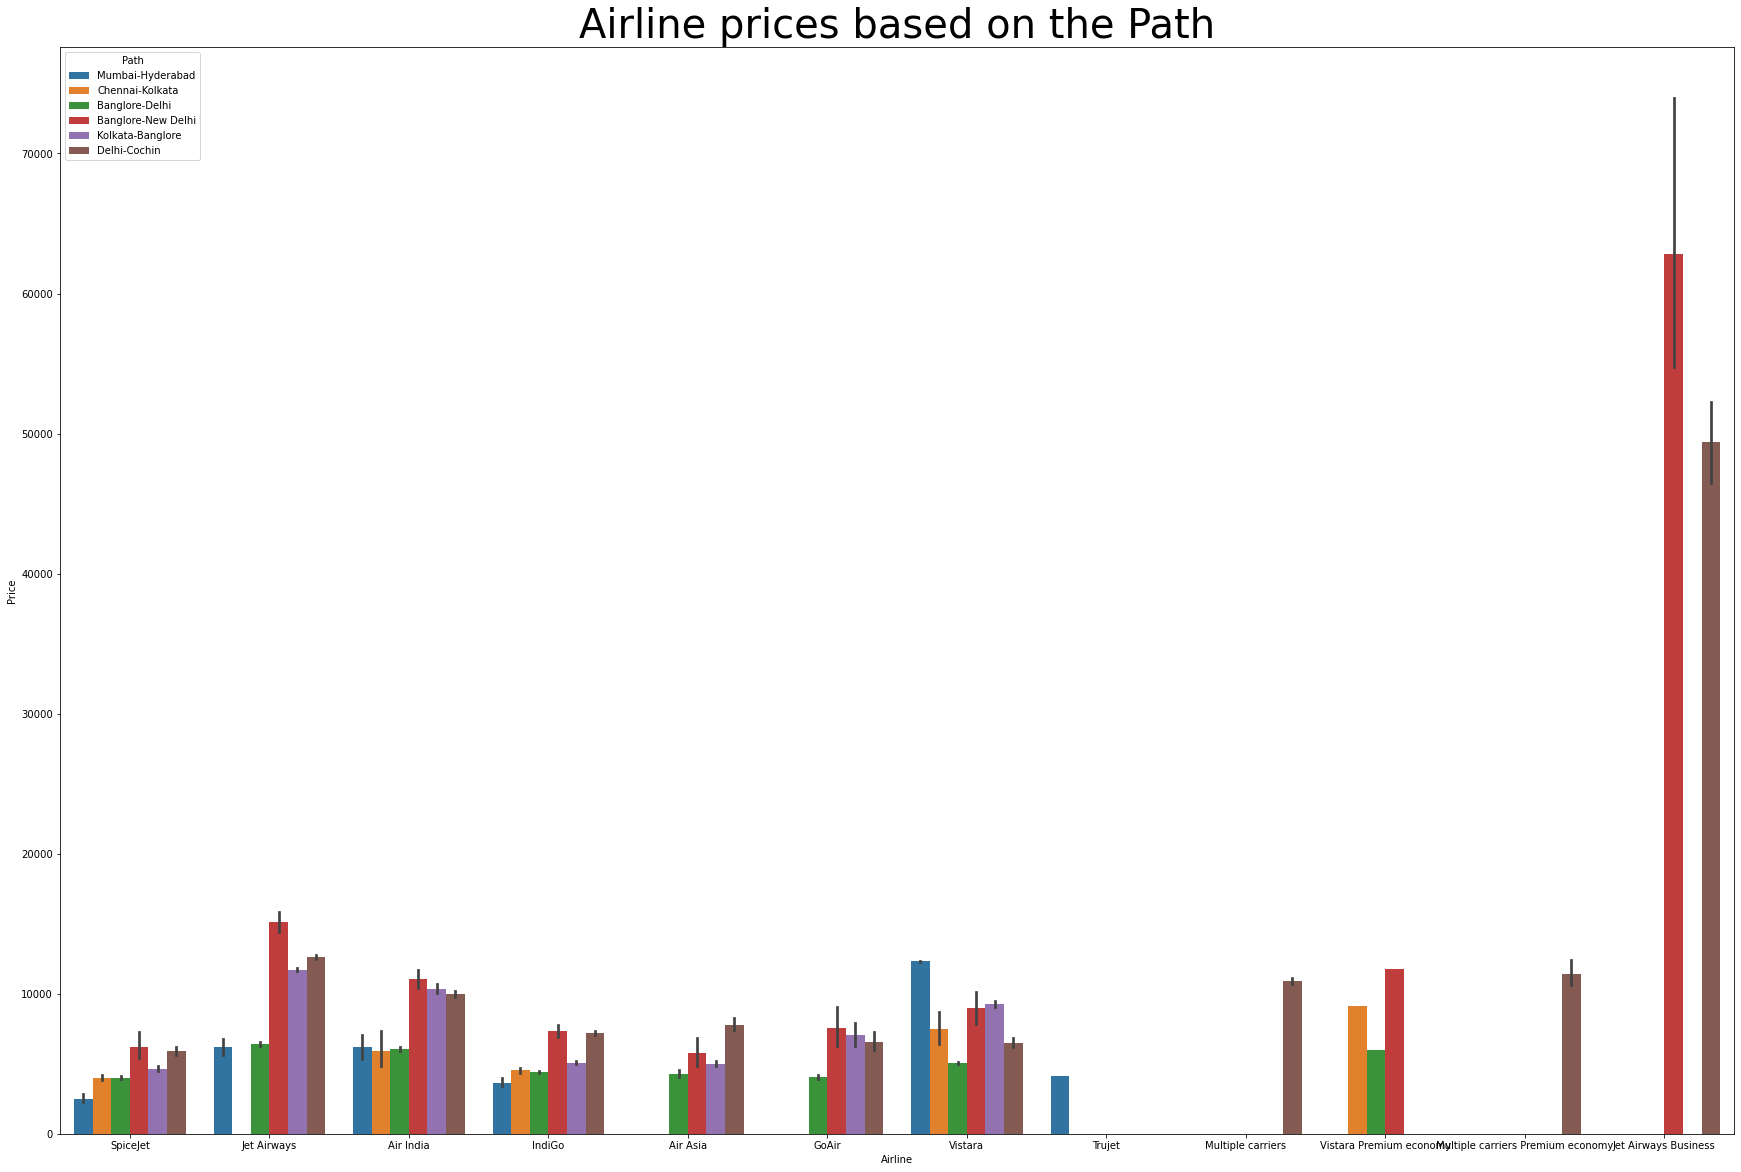

In [13]:
plt.figure(figsize=(30, 20))

# Using The Seaborn Library to plot a realtion Between Catigorical Data 'Airline' and Numerical data 'Price' Based On Catigorical data 'Path'

sns.barplot(x='Airline',y='Price',hue="Path",data=df.sort_values("Price")).set_title('Airline prices based on the Path',fontsize=40)

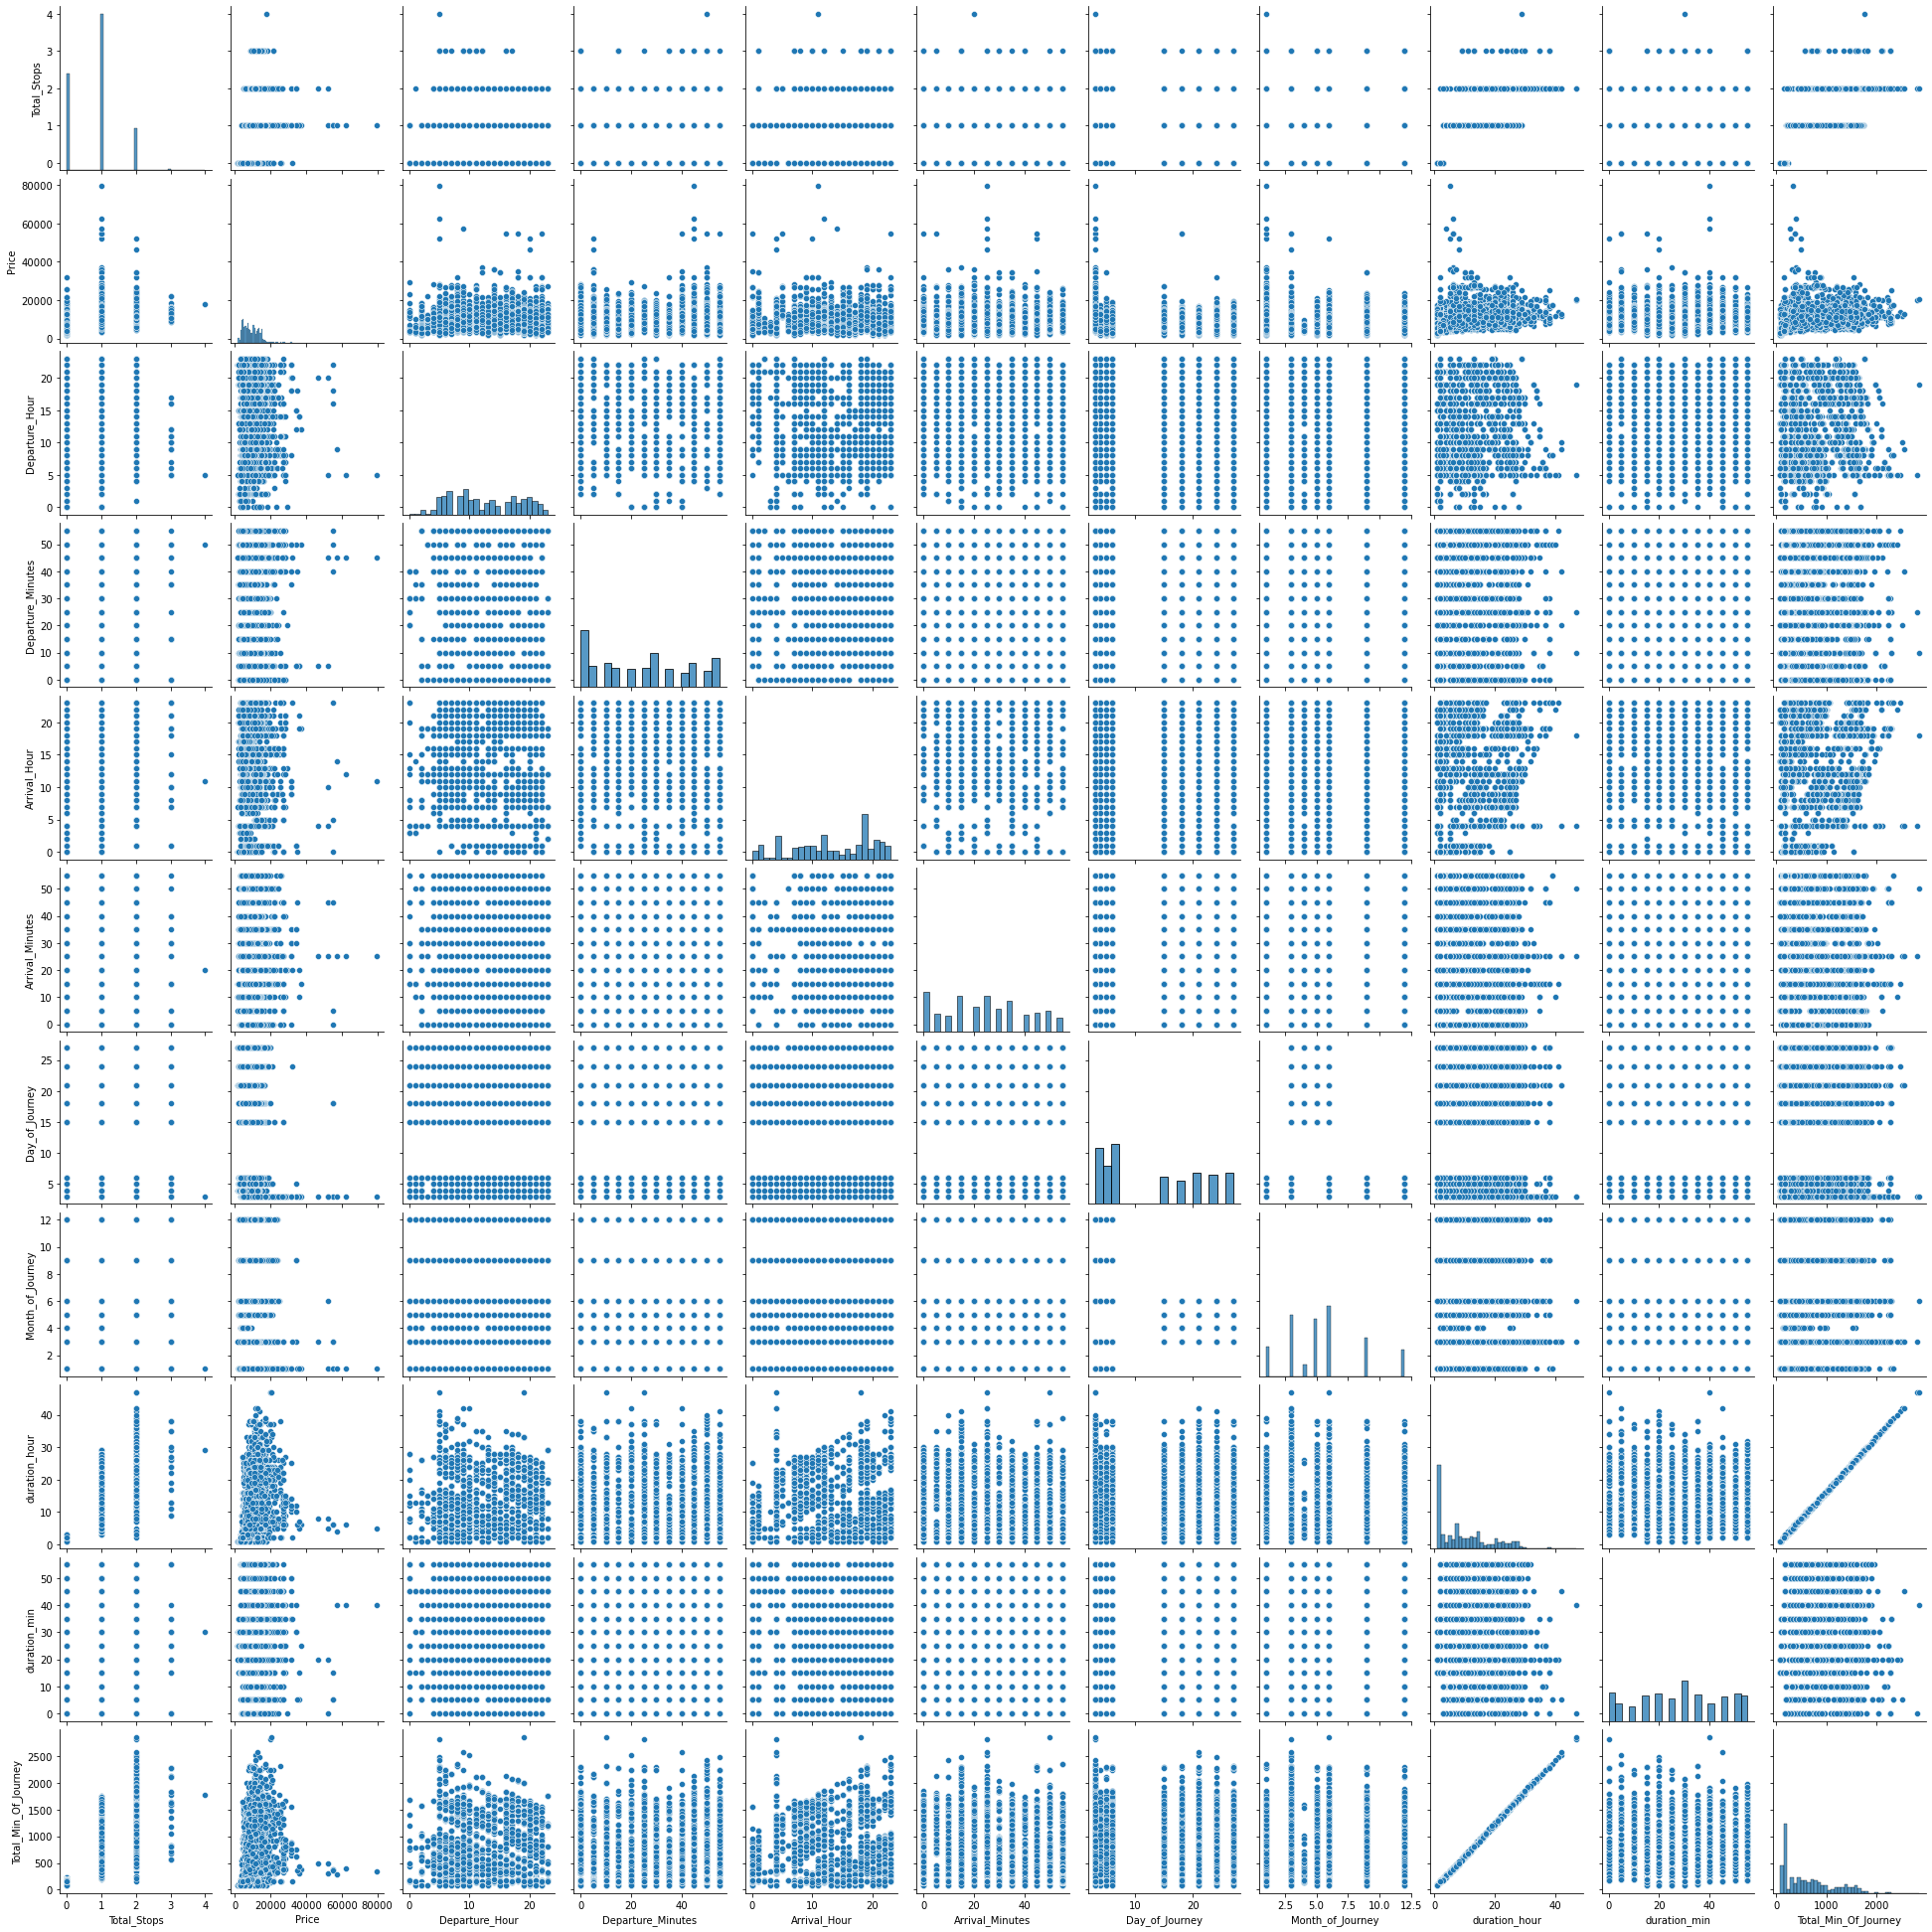

In [14]:
sns.pairplot(df)   # Relation Between Every Numerical Columns

<Figure size 1440x720 with 0 Axes>

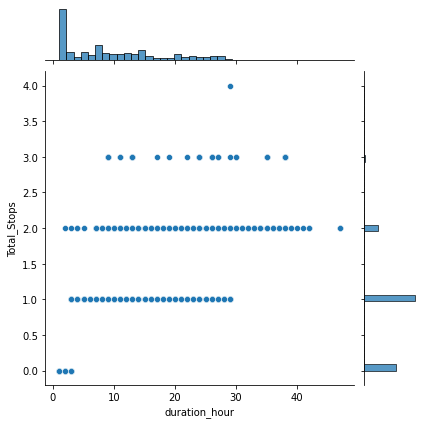

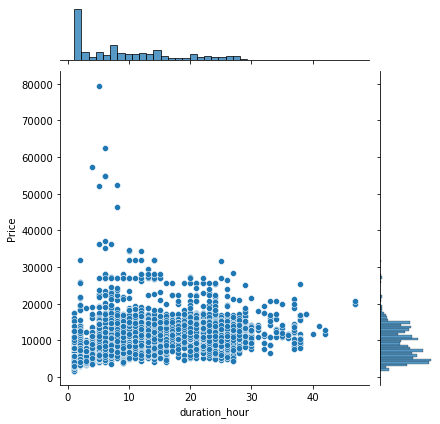

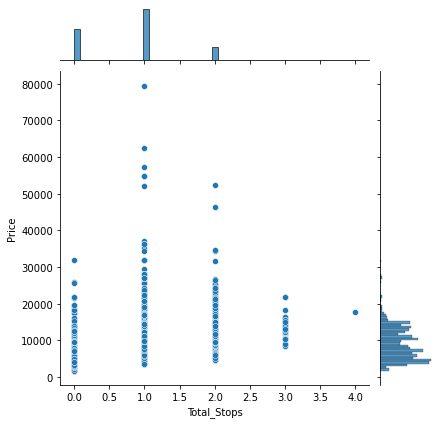

In [15]:
plt.figure(figsize=(20, 10))
 
sns.jointplot(x='duration_hour',y='Total_Stops',data=df,kind='scatter') # Relation Between 'duration_hour' on x-axis and 'Total_Stops' on y-axis

sns.jointplot(x='duration_hour',y='Price',data=df,kind='scatter')  # Relation Between 'duration_hour' on x-axis and 'Price' on y-axis

sns.jointplot(x='Total_Stops',y='Price',data=df,kind='scatter') # Relation Between 'Total_Stops' on x-axis and 'Price' on y-axis


<AxesSubplot:xlabel='Arrival_Hour', ylabel='count'>

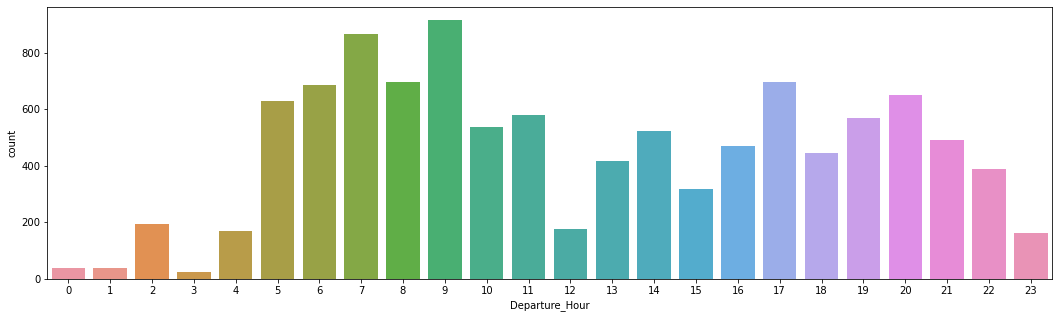

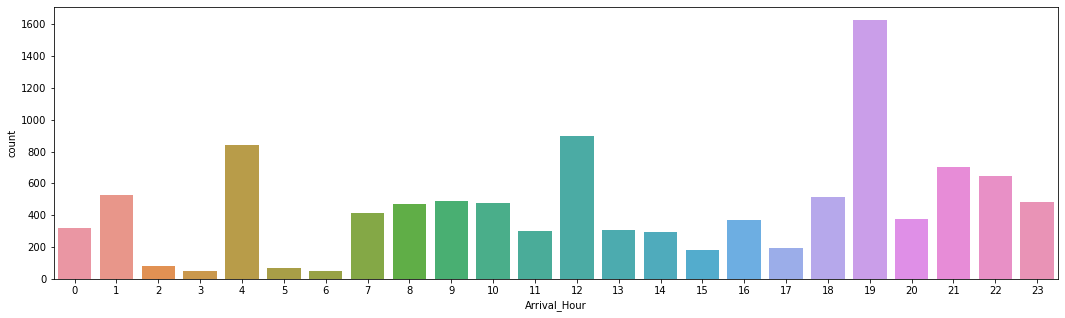

In [16]:
plt.figure(figsize = (18,5))

sns.countplot(x="Departure_Hour",data=df)   # Count The Number Of Flight in Every Departure Hour

plt.figure(figsize = (18,5))

sns.countplot(x="Arrival_Hour",data=df)   # Count The Number Of Flight in Every Arrival Hour



<AxesSubplot:xlabel='Month_of_Journey', ylabel='count'>

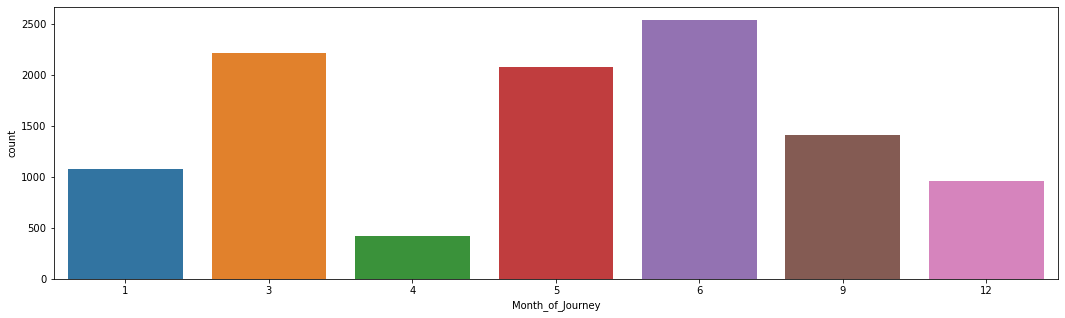

In [17]:
plt.figure(figsize = (18,5))

sns.countplot(x="Month_of_Journey",data=df)   # Count The Number Of Flights in Every Month


<AxesSubplot:>

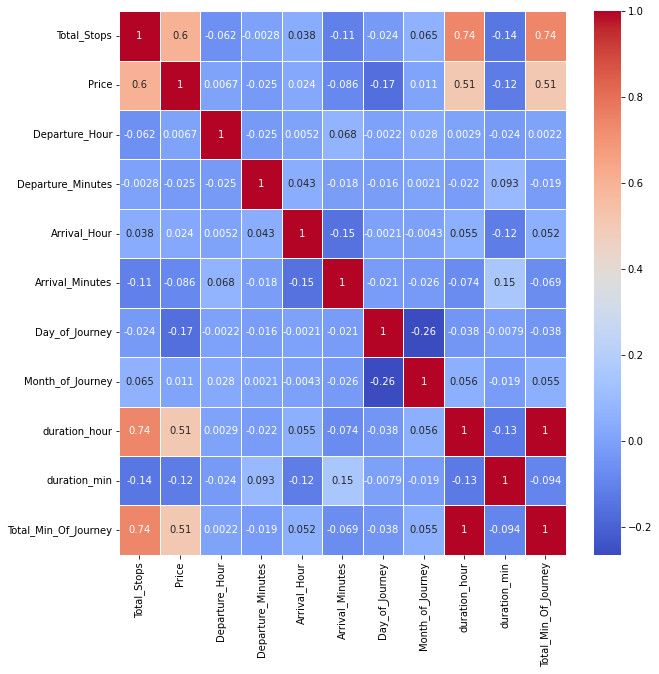

In [18]:
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(df.corr(),cmap="coolwarm",linewidths=.5,annot=True) # Heatmap To The Coolration Between Columns Descibe The Relation Between Each Column and it self 

<AxesSubplot:xlabel='Total_Stops'>

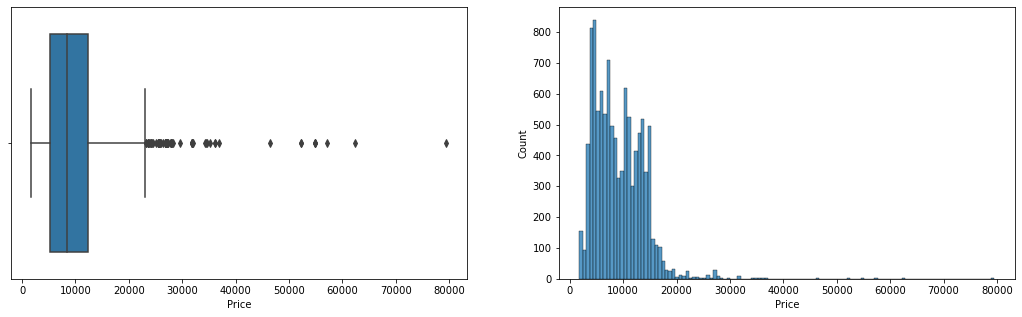

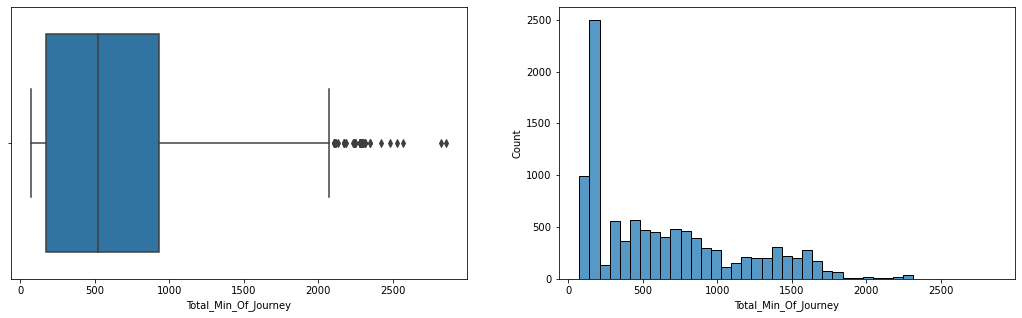

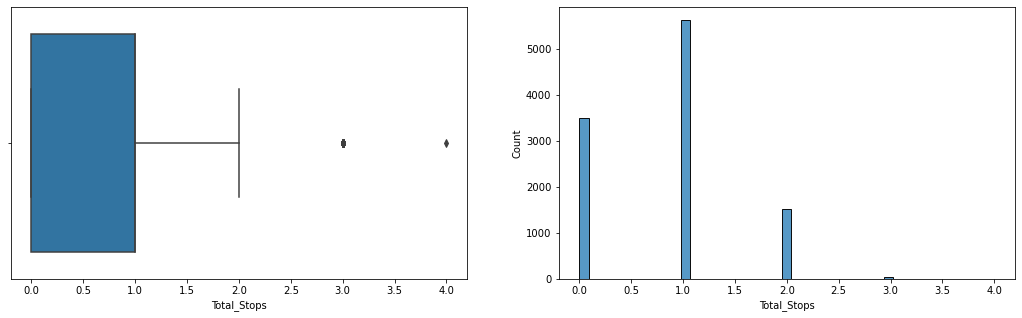

In [19]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,2)

sns.histplot(x = 'Price', data = df ) # Count The Most Prices Paid

plt.subplot(1,2,1)

sns.boxplot(x = 'Price', data = df)  # Box plot of 'Price' to define the min, max, 25%, Median, 75% and Show The Outliers

#-------------------------------------------------------------------

plt.figure(figsize = (18,5))

plt.subplot(1,2,2)

sns.histplot(x = 'Total_Min_Of_Journey', data = df )  # Count The Minutes of Taken For Journey


plt.subplot(1,2,1)

sns.boxplot(x = 'Total_Min_Of_Journey', data = df)   # Box plot of 'Total_Min_Of_Journey' to define the min, max, 25%, Median, 75% and Show The Outliers

#-------------------------------------------------------------------

plt.figure(figsize = (18,5))

plt.subplot(1,2,2)

sns.histplot(x = 'Total_Stops', data = df )   # Count The Total Stops And Count Them 


plt.subplot(1,2,1)

sns.boxplot(x = 'Total_Stops', data = df)   # Box plot of 'Total_Stops' to define the min, max, 25%, Median, 75% and Show The Outliers

#### After remove the Price outliers (<40000)


C:\Users\max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\max\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\max\AppData\Local\Temp\ipykernel_7172\1644768322.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


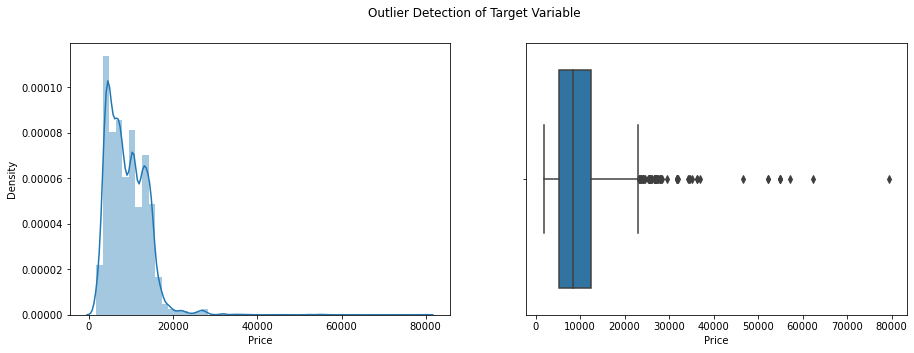

In [21]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df['Price'], ax=ax[0])    # Show The Distribution Of The Price 

sns.boxplot (df['Price'], ax=ax[1])    # Box plot of 'Price' to define the min, max, 25%, Median, 75% and Show The Outliers

plt.suptitle('Outlier Detection of Target Variable')

fig.show()

In [22]:
# Applying The Function to Column Price When There is Price > 40.000 

# Then Apply The Median Of the Column To it else return The Value of x as it's

df['Price'] = df['Price'].apply(lambda x:df['Price'].median() if x > 40000 else x)


C:\Users\max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\max\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\max\AppData\Local\Temp\ipykernel_7172\738249989.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


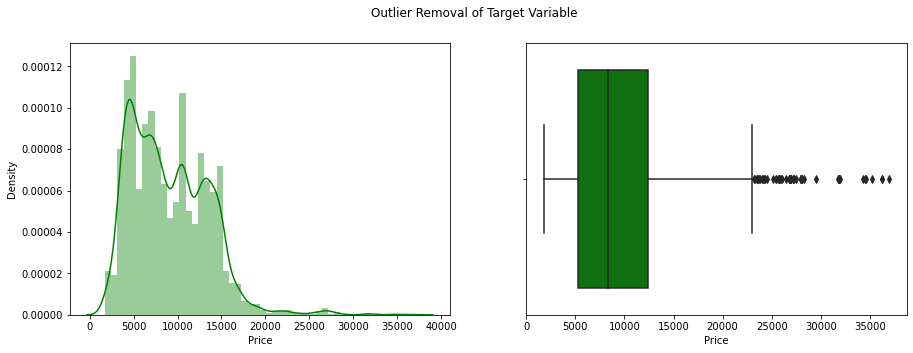

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df['Price'], color='g', ax=ax[0]) # Show The Distribution Of The Price 

sns.boxplot (df['Price'], color='g', ax=ax[1]) # Box plot of 'Price' to define the min, max, 25%, Median, 75% and Show The Outliers

plt.suptitle('Outlier Removal of Target Variable')

fig.show()

##### Clearly, the outliers have been removed but, the distribution is still not looking good. Therefore let's see what happens if we perform Log Transformation

#### When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid


C:\Users\max\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\max\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\max\AppData\Local\Temp\ipykernel_7172\3401900068.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


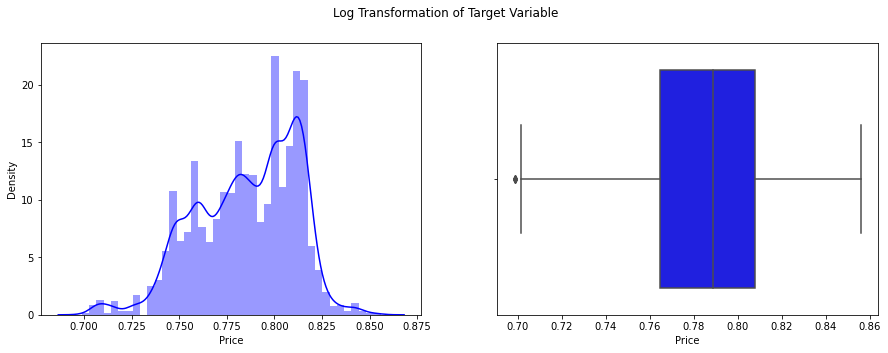

In [31]:
df['Price'] = np.log(df['Price'])  # Take The Log To The Column Price

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df['Price'], color='b', ax=ax[0])  # After Taking The Log

sns.boxplot (df['Price'], color='b', ax=ax[1])  # Box plot of 'Price' to define the min, max, 25%, Median, 75% and Show The Outliers


plt.suptitle('Log Transformation of Target Variable')

fig.show()

#### Now, it is looking much better

In [32]:
df.describe()    # Describtion of The Data

,Total_Stops,Price,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Day_of_Journey,Month_of_Journey,duration_hour,duration_min,Total_Min_Of_Journey
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,0.824080,0.785469,12.490684,24.406891,13.348937,24.687763,12.683831,5.534688,10.245857,28.328808,643.080236
std,0.675164,0.026353,5.748989,18.767046,6.859590,16.504975,8.803713,2.987762,8.494735,16.945106,507.816377
min,0.000000,0.698746,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,75.000000
25%,0.000000,0.764722,8.000000,5.000000,8.000000,10.000000,5.000000,3.000000,2.000000,15.000000,170.000000
50%,1.000000,0.788842,11.000000,25.000000,14.000000,25.000000,6.000000,5.000000,8.000000,30.000000,520.000000
75%,1.000000,0.807896,18.000000,40.000000,19.000000,35.000000,21.000000,6.000000,15.000000,45.000000,930.000000
max,4.000000,0.855737,23.000000,55.000000,23.000000,55.000000,27.000000,12.000000,47.000000,55.000000,2860.000000


# Building Regression Model

In [33]:
# Apply The Label Encoding On The Catigorical Columns

df_filtered = pd.get_dummies(df, columns=['Airline','Source', 'Destination','Additional_Info','Route_1','Route_2','Route_3','Route_4','Route_5','Route_6','Path'])


In [34]:
# Drop Columns We Won't Need In Model

df_filtered = df_filtered.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Route'],axis=1)


In [35]:
df_filtered # Show The Data After Encoding And Droping 

,Total_Stops,Price,Departure_Hour,Departure_Minutes,Arrival_Hour,Arrival_Minutes,Day_of_Journey,Month_of_Journey,duration_hour,duration_min,...,Route_5_ VGA,Route_5_None,Route_6_ DEL,Route_6_None,Path_Banglore-Delhi,Path_Banglore-New Delhi,Path_Chennai-Kolkata,Path_Delhi-Cochin,Path_Kolkata-Banglore,Path_Mumbai-Hyderabad
0,0,0.747819,22,20,1,10,24,3,2,50,...,0,1,0,1,0,1,0,0,0,0
1,2,0.784352,5,50,13,15,5,1,7,25,...,0,1,0,1,0,0,0,0,1,0
2,2,0.813292,9,25,4,25,6,9,19,0,...,0,1,0,1,0,0,0,1,0,0
3,1,0.773510,18,5,23,30,5,12,5,25,...,0,1,0,1,0,0,0,0,1,0
4,1,0.811302,16,50,21,35,3,1,4,45,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0.750810,19,55,22,25,4,9,2,30,...,0,1,0,1,0,0,0,0,1,0
10679,0,0.751332,20,45,23,20,27,4,2,35,...,0,1,0,1,0,0,0,0,1,0
10680,0,0.781369,8,20,11,20,27,4,3,0,...,0,1,0,1,1,0,0,0,0,0
10681,0,0.808934,11,30,14,10,3,1,2,40,...,0,1,0,1,0,1,0,0,0,0


In [36]:
# Identifing The Inputs (Features) (x) And The Output (Target Value) (y)

X = df_filtered.drop(columns=['Price'])

y = df_filtered['Price']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split     #for ml models in python
# 1/3 test , 2/3 train ---> based on data size

#random_state ---> with any value // to get the same output بثبت ال
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  #implement the LinearRegression 

regressor.fit(X_train, y_train) #Train the model

LinearRegression()

In [37]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)  

y_pred

from sklearn import metrics # to evaluate any model

print("MSE:",metrics.mean_squared_error(y_pred,y_test)) # Mean Squared Error

print("MAE:",metrics.mean_absolute_error(y_pred,y_test)) # Absolute Squared Error 

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

print("r2_score:",metrics.r2_score(y_test,y_pred)) # r2_score --> Accuracy for linear regression

MSE: 0.00013059458721697903
MAE: 0.00833178433317475
RMSE: 0.011427798878917103
r2_score: 0.8106418873843078
